Cat Vs Dog Classifier

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.05G/1.06G [00:12<00:00, 135MB/s]
100% 1.06G/1.06G [00:12<00:00, 92.7MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 81s 105ms/step - loss: 1.1910 - accuracy: 0.5644 - val_loss: 0.6596 - val_accuracy: 0.5784
Epoch 2/10
625/625 [==============================] - 76s 120ms/step - loss: 0.6441 - accuracy: 0.6227 - val_loss: 0.6763 - val_accuracy: 0.5608
Epoch 3/10
625/625 [==============================] - 82s 131ms/step - loss: 0.6019 - accuracy: 0.6811 - val_loss: 0.6096 - val_accuracy: 0.6720
Epoch 4/10
625/625 [==============================] - 69s 109ms/step - loss: 0.5526 - accuracy: 0.7279 - val_loss: 0.5354 - val_accuracy: 0.7524
Epoch 5/10
625/625 [==============================] - 67s 107ms/step - loss: 0.5354 - accuracy: 0.7419 - val_loss: 0.6671 - val_accuracy: 0.6300
Epoch 6/10
625/625 [==============================] - 71s 114ms/step - loss: 0.5056 - accuracy: 0.7635 - val_loss: 0.5794 - val_accuracy: 0.7054
Epoch 7/10
625/625 [==============================] - 65s 103ms/step - loss: 0.4811 - accuracy: 0.7823 - val_loss: 0.6522 - val_ac

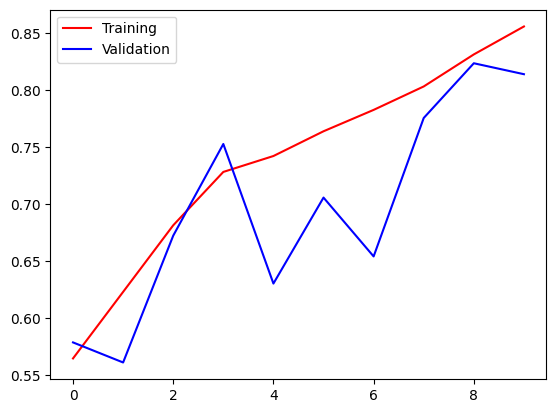

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'] , color='red' , label ='Training')
plt.plot(history.history['val_accuracy'] , color = 'blue' , label = 'Validation')
plt.legend()
plt.show()

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/cat.jpeg')

In [ ]:
test_img.shape

(275, 183, 3)

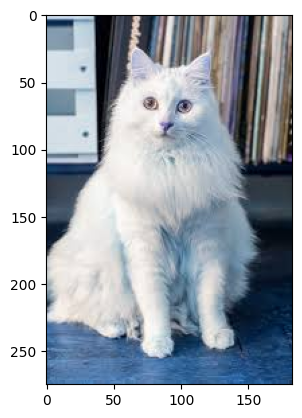

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))
model.predict(test_input)

1/1 [==============================] - 0s 25ms/step


array([[0.]], dtype=float32)

In [ ]:
test_img1 = cv2.imread('/content/dogs_vs_cats/test/dogs/dog.10006.jpg')

In [ ]:
test_img1.shape

(339, 499, 3)

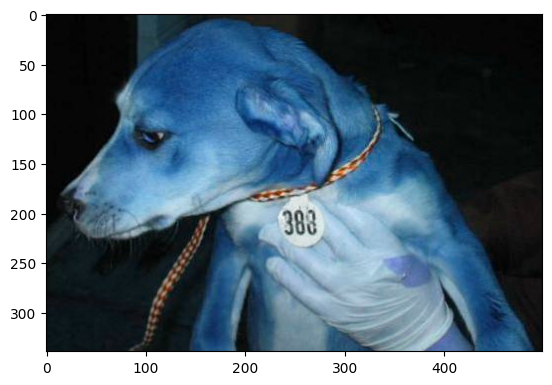

In [ ]:
plt.imshow(test_img1)

In [ ]:
test_img1 = cv2.resize(test_img1,(256,256))

In [ ]:
test_input1 = test_img1.reshape((1,256,256,3))

In [ ]:
model.predict(test_input1)

1/1 [==============================] - 0s 22ms/step


array([[0.]], dtype=float32)